In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.ensemble import AdaBoostClassifier;
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm;
from sklearn.naive_bayes import GaussianNB;
from sklearn import metrics;
from sklearn.metrics import classification_report

In [329]:
import torch
from torch.autograd import Variable

In [330]:
import torch.utils.data as Data
import torchvision

In [331]:
%matplotlib inline

In [332]:
# Data download and preprocessing

DOWNLOAD_MNIST = True # If already download , set as False

train_data = torchvision.datasets.MNIST(
    root ='./mnist/', 
    train = True, # this is training data
    transform = torchvision.transforms.ToTensor () ,
    download = DOWNLOAD_MNIST,)
test_data = torchvision.datasets.MNIST(root ='./mnist/', train = False)

In [333]:
# change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [334]:
# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## 1

### 1a

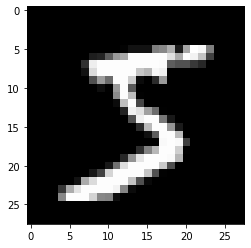

In [335]:
image = X_train[0]# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [336]:
Y_train[0]

5

### 1 b

In [337]:
X_train = tf.cast(X_train, dtype='float32')/255.0
X_train = tf.reshape(X_train, [60000, 784])
X_test = tf.cast(X_test, dtype='float32')/255.0
X_test = tf.reshape(X_test, [10000, 784])

### 1c

In [338]:
Y_train_ori = Y_train
Y_train = tf.one_hot(Y_train, depth=10)
Y_test_ori = Y_test
Y_test = tf.one_hot(Y_test, depth=10)

## 2

### 2a

In [339]:
knn = KNeighborsClassifier(n_neighbors = 28)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

In [340]:
Y_pred = knn.predict(X_test)
print(f'Accuracy for KNN classifier is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for KNN classifier is: 0.950


In [341]:
dt = DecisionTreeClassifier(max_depth = 10)

In [342]:
abc = AdaBoostClassifier(dt)
# Train Adaboost Classifer
model = abc.fit(X_train, Y_train_ori)

#Predict the response for test dataset
Y_pred = model.predict(X_test)
print(f'Accuracy for Adaboost classifier is: {metrics.accuracy_score(Y_test_ori, Y_pred):0.3f}')

Accuracy for Adaboost classifier is: 0.942


In [343]:
clf = svm.SVC()
clf.fit(X_train, Y_train_ori)
Y_pred = clf.predict(X_test)
print(f'Accuracy for Adaboost classifier is: {metrics.accuracy_score(Y_test_ori, Y_pred):0.3f}')

Accuracy for Adaboost classifier is: 0.979


### 2b

In [371]:
from keras import Sequential
from keras.layers import Dense
nn = Sequential()
nn.add(Dense(800, activation = 'relu', input_dim = 784))
nn.add(Dense(10, activation = 'softmax'))
nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
nn.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1897 - acc: 0.9445
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0753 - acc: 0.9768
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0491 - acc: 0.9845
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0346 - acc: 0.9891
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0263 - acc: 0.9914
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0194 - acc: 0.9937
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0163 - acc: 0.9942
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0164 - acc: 0.9945
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0118 - acc: 0.9959
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0123 - acc: 0.9958


In [372]:
Y_pred = nn.predict(X_test)
Y_pred = (Y_pred > 0.5) 

In [373]:
print(f'Accuracy for NN classifier is: {metrics.accuracy_score(Y_test, Y_pred):0.3f}')

Accuracy for NN classifier is: 0.974


In [374]:
# Data download and preprocessing

DOWNLOAD_MNIST = True # If already download , set as False

train_data = torchvision.datasets.MNIST(
    root ='./mnist/', 
    train = True, # this is training data
    transform = torchvision.transforms.ToTensor () ,
    download = DOWNLOAD_MNIST,)
test_data = torchvision.datasets.MNIST(root ='./mnist/', train = False)

In [375]:
# change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [376]:
# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [377]:
X_train = X_train/255
X_train = X_train.reshape(60000, 784)
X_train_torch = torch.from_numpy(X_train)

In [378]:
X_test = X_test/255
X_test = X_test.reshape(10000, 784)
X_test_torch = torch.from_numpy(X_test)

In [379]:
Y_train_torch = torch.from_numpy(Y_train)
Y_test_torch = torch.from_numpy(Y_test)

## 3 ab

### seed = 1

In [380]:
import torch.nn as nn
import torch.nn.functional as F

In [12]:
torch.manual_seed(1)
class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        

    def forward(self, x):
        # nonlinear activation
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x

net = OurNet(n_feature=784, n_hidden=100, n_output=10) 

In [13]:
# optimizing methods
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
# choose loss function
loss_func = torch.nn.CrossEntropyLoss()

In [264]:
X_train_torch = X_train_torch.type(torch.FloatTensor)
Y_train_torch = Y_train_torch.type(torch.LongTensor)

In [265]:
X_test_torch = X_test_torch.type(torch.FloatTensor)
Y_test_torch = Y_test_torch.type(torch.LongTensor)

In [16]:
def train_single(model, epoch):
    train_out = []
    test_out = []
    for t in range(epoch):
        # forward passing
        out_tr = model(X_train_torch)
        train_out.append(out_tr)
        loss = loss_func(out_tr, Y_train_torch)
        loss_train.append(loss.detach().numpy())
        optimizer.zero_grad()
        loss.backward()   
        optimizer.step()
        out_te = model(X_test_torch)
        test_out.append(out_te)
        loss1 = loss_func(out_te, Y_test_torch)
        loss_test.append(loss1.detach().numpy())
        if t%20 == 0:
        # printing the validation loss
            print('Epoch : ',t+1, '\t', 'train loss :', loss.detach().numpy())

    train_accuracy = []
    test_accuracy = []
    for t in range(epoch):
        train_prediction = torch.max(train_out[t],1)[1]   ##indice for maximum of each row
        test_prediction = torch.max(test_out[t],1)[1]
        pred_y_train = train_prediction.data.numpy()
        pred_y_test = test_prediction.data.numpy()
        target_y_train = Y_train_torch.data.numpy()
        target_y_test = Y_test_torch.data.numpy()
        train_accuracy.append(float((pred_y_train == target_y_train).astype(int).sum()) / float(target_y_train.size))
        test_accuracy.append(float((pred_y_test == target_y_test).astype(int).sum()) / float(target_y_test.size))
    
    for i in range(epoch):
        train_error.append(1-train_accuracy[i])
        test_error.append(1-test_accuracy[i])
    print("final test cross_entropy error loss is ", loss_test[epoch-1])
    print("final test mis-classification error is ", test_error[epoch-1])

In [17]:
n_epochs = 200
loss_train = []
loss_test = []
train_error = []
test_error = []
train_single(net, n_epochs)

Epoch :  1 	 train loss : 2.3179433
Epoch :  21 	 train loss : 1.9139081
Epoch :  41 	 train loss : 1.3017827
Epoch :  61 	 train loss : 0.89015293
Epoch :  81 	 train loss : 0.69705456
Epoch :  101 	 train loss : 0.5943162
Epoch :  121 	 train loss : 0.53120637
Epoch :  141 	 train loss : 0.4885208
Epoch :  161 	 train loss : 0.4577102
Epoch :  181 	 train loss : 0.43439847
final test cross_entropy error loss is  0.39722845
final test mis-classification error is  0.10550000000000004


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 1')

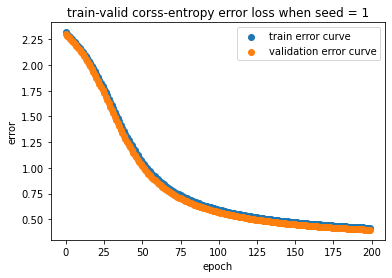

In [18]:
plt.scatter(y = loss_train, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = loss_test, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 1")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 1')

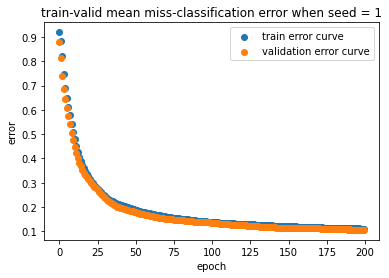

In [19]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 1")

### seed = 100

In [20]:
torch.manual_seed(100)

class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x

net2 = OurNet(n_feature=784, n_hidden=100, n_output=10)
optimizer = torch.optim.SGD(net2.parameters(), lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()

In [21]:
loss_train = []
loss_test = []
train_error = []
test_error = []
n_epochs = 200
train_single(net2, n_epochs)

Epoch :  1 	 train loss : 2.3200767
Epoch :  21 	 train loss : 1.911888
Epoch :  41 	 train loss : 1.2989203
Epoch :  61 	 train loss : 0.90516996
Epoch :  81 	 train loss : 0.7136704
Epoch :  101 	 train loss : 0.60797626
Epoch :  121 	 train loss : 0.5418562
Epoch :  141 	 train loss : 0.49685475
Epoch :  161 	 train loss : 0.46437457
Epoch :  181 	 train loss : 0.4398673
final test cross_entropy error loss is  0.40183088
final test mis-classification error is  0.1058


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 100')

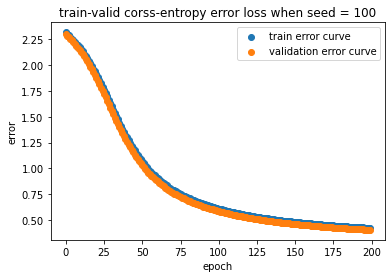

In [22]:
plt.scatter(y = loss_train, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = loss_test, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 100")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 100')

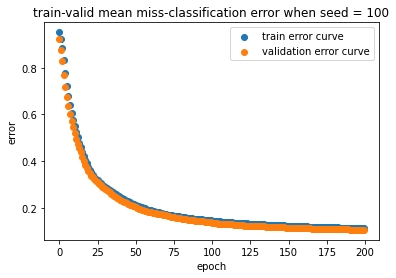

In [23]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 100")

### seed = 1000

In [24]:
torch.manual_seed(1000)
class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x

net3 = OurNet(n_feature=784, n_hidden=100, n_output=10)
optimizer = torch.optim.SGD(net3.parameters(), lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()

In [25]:
loss_train = []
loss_test = []
train_error = []
test_error = []
n_epochs = 200
train_single(net3, n_epochs)

Epoch :  1 	 train loss : 2.296386
Epoch :  21 	 train loss : 1.8019158
Epoch :  41 	 train loss : 1.1913466
Epoch :  61 	 train loss : 0.8508828
Epoch :  81 	 train loss : 0.6827035
Epoch :  101 	 train loss : 0.5871998
Epoch :  121 	 train loss : 0.526611
Epoch :  141 	 train loss : 0.48513994
Epoch :  161 	 train loss : 0.45512223
Epoch :  181 	 train loss : 0.43241212
final test cross_entropy error loss is  0.39617485
final test mis-classification error is  0.10370000000000001


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 1000')

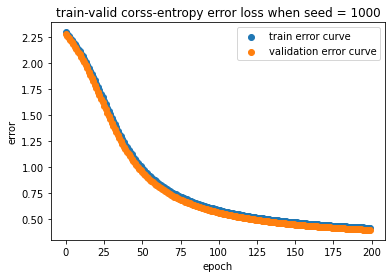

In [26]:
plt.scatter(y = loss_train, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = loss_test, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 1000")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 1000')

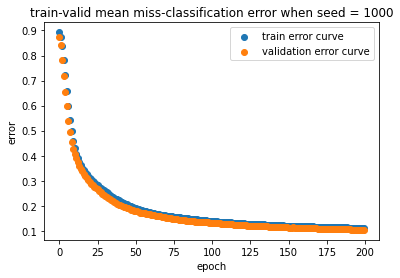

In [27]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 1000")

### seed = 10000

In [28]:
torch.manual_seed(10000)
class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x

net4 = OurNet(n_feature=784, n_hidden=100, n_output=10)
optimizer = torch.optim.SGD(net4.parameters(), lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()

In [29]:
loss_train = []
loss_test = []
train_error = []
test_error = []
n_epochs = 200
train_single(net4, n_epochs)

Epoch :  1 	 train loss : 2.3028762
Epoch :  21 	 train loss : 1.8523275
Epoch :  41 	 train loss : 1.2366866
Epoch :  61 	 train loss : 0.87856096
Epoch :  81 	 train loss : 0.70045006
Epoch :  101 	 train loss : 0.5999821
Epoch :  121 	 train loss : 0.5363248
Epoch :  141 	 train loss : 0.4926817
Epoch :  161 	 train loss : 0.4610526
Epoch :  181 	 train loss : 0.43713155
final test cross_entropy error loss is  0.39844418
final test mis-classification error is  0.10609999999999997


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 10000')

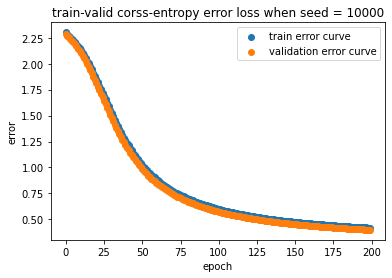

In [30]:
plt.scatter(y = loss_train, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = loss_test, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 10000")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 10000')

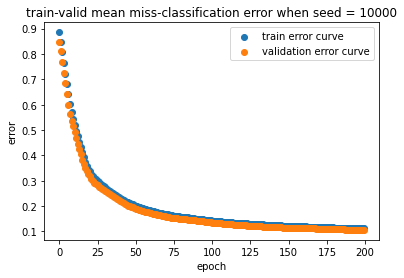

In [31]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 10000")

### seed = 10086

In [32]:
torch.manual_seed(10086)
class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x

net5 = OurNet(n_feature=784, n_hidden=100, n_output=10)
optimizer = torch.optim.SGD(net5.parameters(), lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()

In [33]:
loss_train = []
loss_test = []
train_error = []
test_error = []
n_epochs = 200
train_single(net5, n_epochs)

Epoch :  1 	 train loss : 2.3087256
Epoch :  21 	 train loss : 1.9234742
Epoch :  41 	 train loss : 1.2990752
Epoch :  61 	 train loss : 0.8862418
Epoch :  81 	 train loss : 0.69437075
Epoch :  101 	 train loss : 0.5928858
Epoch :  121 	 train loss : 0.5307699
Epoch :  141 	 train loss : 0.4888453
Epoch :  161 	 train loss : 0.45860127
Epoch :  181 	 train loss : 0.43571365
final test cross_entropy error loss is  0.39783475
final test mis-classification error is  0.10670000000000002


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 10086')

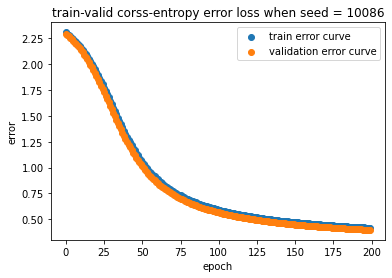

In [34]:
plt.scatter(y = loss_train, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = loss_test, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 10086")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 10086')

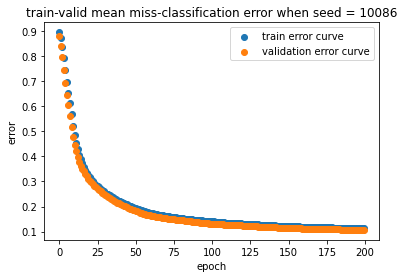

In [35]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 10086")

## 3 c

I notice that net3 has the smallest cross entropy error among the five models

In [323]:
W = net3.state_dict()['hidden.weight'].reshape(100,28,28)

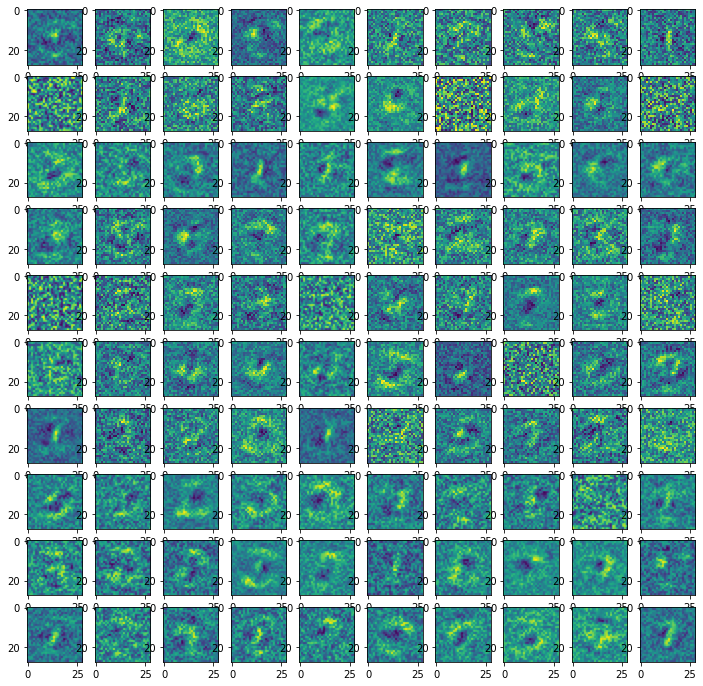

In [324]:
fig = plt.figure(figsize = (12,12))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(W[i])

## 3 d

### lr = 0.01

In [38]:
torch.manual_seed(1000)
class OurNet(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden, n_output):
        super(OurNet, self).__init__()     
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.out = torch.nn.Linear(n_hidden, n_output)
        

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.out(x)                 
        return x

net6 = OurNet(n_feature=784, n_hidden=100, n_output=10)
optimizer = torch.optim.SGD(net6.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()

In [39]:
loss_train = []
loss_test = []
train_error = []
test_error = []
n_epochs = 200
train_single(net6, n_epochs)

Epoch :  1 	 train loss : 2.296386
Epoch :  21 	 train loss : 2.2592006
Epoch :  41 	 train loss : 2.220688
Epoch :  61 	 train loss : 2.1789525
Epoch :  81 	 train loss : 2.1334338
Epoch :  101 	 train loss : 2.084217
Epoch :  121 	 train loss : 2.0315156
Epoch :  141 	 train loss : 1.9755327
Epoch :  161 	 train loss : 1.9164618
Epoch :  181 	 train loss : 1.8546257
final test cross_entropy error loss is  1.7806008
final test mis-classification error is  0.2995


Text(0.5, 1.0, 'train-valid corss-entropy error loss when lr = 0.01')

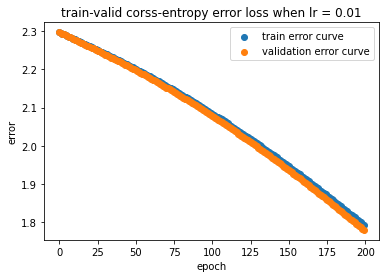

In [40]:
plt.scatter(y = loss_train, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = loss_test, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when lr = 0.01")

Text(0.5, 1.0, 'train-valid mean miss-classification error when lr = 0.01')

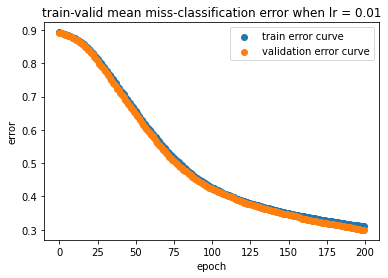

In [41]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when lr = 0.01")

### lr = 0.2

In [43]:
net7 = OurNet(n_feature=784, n_hidden=100, n_output=10)
optimizer = torch.optim.SGD(net7.parameters(), lr=0.2)
loss_func = torch.nn.CrossEntropyLoss()
loss_train = []
loss_test = []
train_error = []
test_error = []
n_epochs = 200
train_single(net7, n_epochs)

Epoch :  1 	 train loss : 2.3195474
Epoch :  21 	 train loss : 1.2630275
Epoch :  41 	 train loss : 0.6998918
Epoch :  61 	 train loss : 0.534946
Epoch :  81 	 train loss : 0.4603239
Epoch :  101 	 train loss : 0.4182121
Epoch :  121 	 train loss : 0.39098087
Epoch :  141 	 train loss : 0.37163755
Epoch :  161 	 train loss : 0.35692775
Epoch :  181 	 train loss : 0.34517875
final test cross_entropy error loss is  0.3211757
final test mis-classification error is  0.09019999999999995


Text(0.5, 1.0, 'train-valid corss-entropy error loss when lr = 0.2')

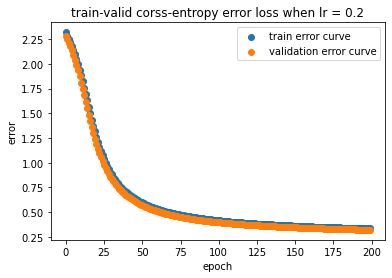

In [44]:
plt.scatter(y = loss_train, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = loss_test, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when lr = 0.2")

Text(0.5, 1.0, 'train-valid mean miss-classification error when lr = 0.2')

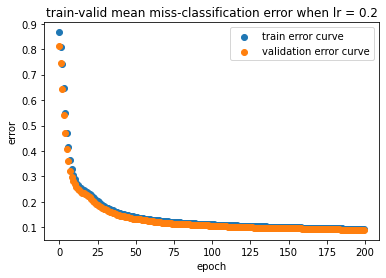

In [45]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when lr = 0.2")

### lr = 0.5

In [46]:
net8 = OurNet(n_feature=784, n_hidden=100, n_output=10)
optimizer = torch.optim.SGD(net8.parameters(), lr=0.5)
loss_func = torch.nn.CrossEntropyLoss()
loss_train = []
loss_test = []
train_error = []
test_error = []
n_epochs = 200
train_single(net8, n_epochs)

Epoch :  1 	 train loss : 2.3193634
Epoch :  21 	 train loss : 1.0737603
Epoch :  41 	 train loss : 0.5581579
Epoch :  61 	 train loss : 0.38928264
Epoch :  81 	 train loss : 0.33435163
Epoch :  101 	 train loss : 0.30928716
Epoch :  121 	 train loss : 0.29197738
Epoch :  141 	 train loss : 0.27691823
Epoch :  161 	 train loss : 0.26261207
Epoch :  181 	 train loss : 0.2504599
final test cross_entropy error loss is  0.23343064
final test mis-classification error is  0.06499999999999995


Text(0.5, 1.0, 'train-valid corss-entropy error loss when lr = 0.5')

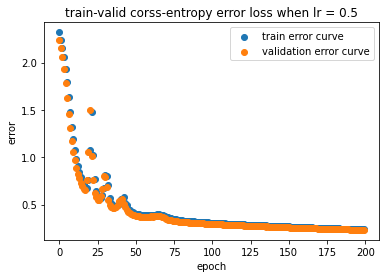

In [47]:
plt.scatter(y = loss_train, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = loss_test, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when lr = 0.5")

Text(0.5, 1.0, 'train-valid mean miss-classification error when lr = 0.5')

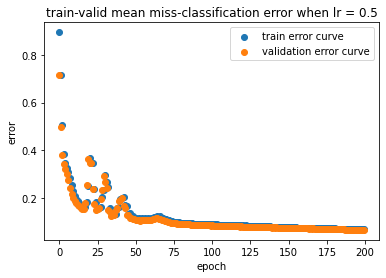

In [48]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when lr = 0.5")

### momentum = 0.5

In [49]:
net9 = OurNet(n_feature=784, n_hidden=100, n_output=10)
optimizer = torch.optim.SGD(net9.parameters(), lr=0.1, momentum = 0.5)
loss_func = torch.nn.CrossEntropyLoss()
loss_train = []
loss_test = []
train_error = []
test_error = []
n_epochs = 200
train_single(net9, n_epochs)

Epoch :  1 	 train loss : 2.3072257
Epoch :  21 	 train loss : 1.330273
Epoch :  41 	 train loss : 0.69894934
Epoch :  61 	 train loss : 0.53122586
Epoch :  81 	 train loss : 0.45808294
Epoch :  101 	 train loss : 0.41696918
Epoch :  121 	 train loss : 0.39022738
Epoch :  141 	 train loss : 0.3710389
Epoch :  161 	 train loss : 0.3562618
Epoch :  181 	 train loss : 0.3442924
final test cross_entropy error loss is  0.32080445
final test mis-classification error is  0.09009999999999996


Text(0.5, 1.0, 'train-valid corss-entropy error loss when momentum = 0.5')

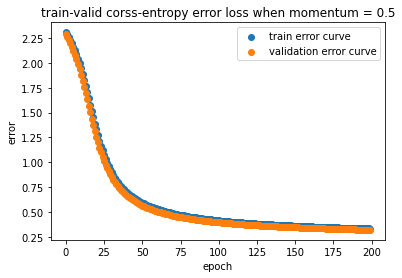

In [50]:
plt.scatter(y = loss_train, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = loss_test, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when momentum = 0.5")

Text(0.5, 1.0, 'train-valid mean miss-classification error when momentum = 0.5')

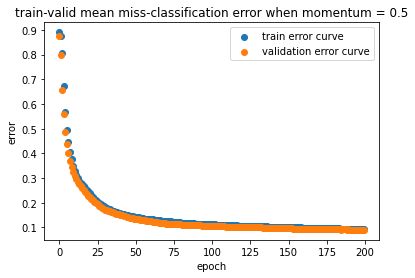

In [51]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when momentum = 0.5")

### momentum = 0.9

In [52]:
net10 = OurNet(n_feature=784, n_hidden=100, n_output=10)
optimizer = torch.optim.SGD(net10.parameters(), lr=0.1, momentum = 0.9)
loss_func = torch.nn.CrossEntropyLoss()
loss_train = []
loss_test = []
train_error = []
test_error = []
n_epochs = 200
train_single(net10, n_epochs)

Epoch :  1 	 train loss : 2.303581
Epoch :  21 	 train loss : 0.53810424
Epoch :  41 	 train loss : 0.38178256
Epoch :  61 	 train loss : 0.32105508
Epoch :  81 	 train loss : 0.29335892
Epoch :  101 	 train loss : 0.27416188
Epoch :  121 	 train loss : 0.2575563
Epoch :  141 	 train loss : 0.2425928
Epoch :  161 	 train loss : 0.22903956
Epoch :  181 	 train loss : 0.216793
final test cross_entropy error loss is  0.20503423
final test mis-classification error is  0.059699999999999975


Text(0.5, 1.0, 'train-valid corss-entropy error loss when momentum = 0.9')

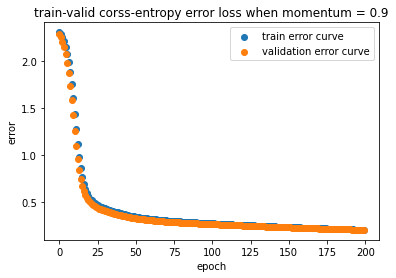

In [53]:
plt.scatter(y = loss_train, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = loss_test, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when momentum = 0.9")

Text(0.5, 1.0, 'train-valid mean miss-classification error when momentum = 0.9')

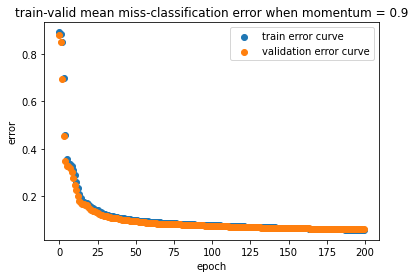

In [54]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when momentum = 0.9")

## 4ab

In [266]:
X_train_torch = X_train_torch.reshape(60000,1,28,28)
X_train_torch.size()

torch.Size([60000, 1, 28, 28])

In [267]:
X_test_torch = X_test_torch.reshape(10000,1,28,28)
X_test_torch.size()

torch.Size([10000, 1, 28, 28])

In [268]:
Train_data = Data.TensorDataset(X_train_torch, Y_train_torch)
Test_data = Data.TensorDataset(X_test_torch, Y_test_torch)

In [269]:
BATCH_SIZE = 64
trainloader = torch.utils.data.DataLoader(Train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(Test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [270]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [271]:
labels.shape

torch.Size([64])

### seed = 1

In [ ]:
torch.manual_seed(1)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.out = torch.nn.Linear(4 * 14 * 14, 10)
    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [272]:
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = corrects/batch_size
    return accuracy.item()

In [273]:
def train_CNN(model, epoch):
    for t in range(epoch):
        train_running_loss = 0.0
        train_acc = 0.0
        for step, (batch_x, batch_y) in enumerate(trainloader):    
            # forward passing
            out_tr = model(batch_x)
            loss = loss_func(out_tr, batch_y)
            optimizer.zero_grad()
            loss.backward()   
            optimizer.step()
            train_running_loss += loss.detach().numpy()
            train_acc += get_accuracy(out_tr, batch_y, BATCH_SIZE)
        train_loss.append(train_running_loss / step)
        train_accuracy.append(train_acc/step)
        if t%20 == 0:
            print('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f' 
                %(t, train_running_loss / step, train_acc/step))
        out_te = model(X_test_torch)
        test_prediction = torch.max(out_te,1)[1]
        pred_y_test = test_prediction.data.numpy()
        target_y_test = Y_test_torch.data.numpy()
        loss1 = loss_func(out_te, Y_test_torch)
        test_loss.append(loss1.detach().numpy())
        test_accuracy.append(float((pred_y_test == target_y_test).astype(int).sum()) / float(target_y_test.size))
    
    for i in range(epoch):
        train_error.append(1-train_accuracy[i])
        test_error.append(1-test_accuracy[i])
    print("final test cross_entropy error loss for CNN is ", test_loss[epoch-1])
    print("final test mis-classification error for CNN is ", test_error[epoch-1])

In [ ]:
CNNnet1 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(CNNnet1.parameters(), lr=0.1)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    CNNnet1 = CNNnet1.cuda()
    criterion = criterion.cuda()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []
train_CNN(CNNnet1, n_epochs)

Epoch:  0 | Loss: 0.4452 | Train Accuracy: 0.87
Epoch:  20 | Loss: 0.0733 | Train Accuracy: 0.98
Epoch:  40 | Loss: 0.0638 | Train Accuracy: 0.98
Epoch:  60 | Loss: 0.0591 | Train Accuracy: 0.98
Epoch:  80 | Loss: 0.0559 | Train Accuracy: 0.98
Epoch:  100 | Loss: 0.0539 | Train Accuracy: 0.98
Epoch:  120 | Loss: 0.0517 | Train Accuracy: 0.98
Epoch:  140 | Loss: 0.0501 | Train Accuracy: 0.98
Epoch:  160 | Loss: 0.0497 | Train Accuracy: 0.98
Epoch:  180 | Loss: 0.0486 | Train Accuracy: 0.98
final test cross_entropy error loss for CNN is  0.12540391
final test mis-classification error for CNN is  0.030200000000000005


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 1 for CNN')

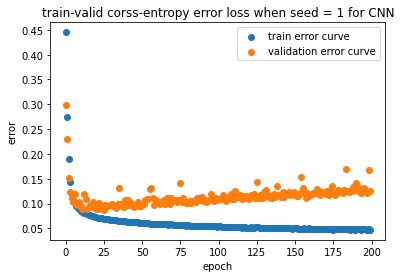

In [ ]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 1 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 1 for CNN')

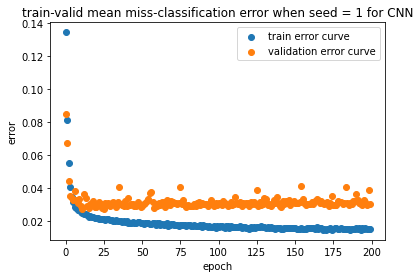

In [ ]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 1 for CNN")

### seed = 100

In [ ]:
torch.manual_seed(100)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers = torch.nn.Sequential(
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.out = torch.nn.Linear(4 * 14 * 14, 10)
    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [ ]:
CNNnet2 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(CNNnet2.parameters(), lr=0.1)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    CNNnet2 = CNNnet2.cuda()
    criterion = criterion.cuda()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(CNNnet2, n_epochs)

Epoch:  0 | Loss: 0.4098 | Train Accuracy: 0.88
Epoch:  20 | Loss: 0.0499 | Train Accuracy: 0.99
Epoch:  40 | Loss: 0.0379 | Train Accuracy: 0.99
Epoch:  60 | Loss: 0.0310 | Train Accuracy: 0.99
Epoch:  80 | Loss: 0.0277 | Train Accuracy: 0.99
Epoch:  100 | Loss: 0.0239 | Train Accuracy: 0.99
Epoch:  120 | Loss: 0.0221 | Train Accuracy: 0.99
Epoch:  140 | Loss: 0.0201 | Train Accuracy: 0.99
Epoch:  160 | Loss: 0.0182 | Train Accuracy: 0.99
Epoch:  180 | Loss: 0.0168 | Train Accuracy: 1.00
final test cross_entropy error loss for CNN is  0.1742442
final test mis-classification error for CNN is  0.03390000000000004


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 100 for CNN')

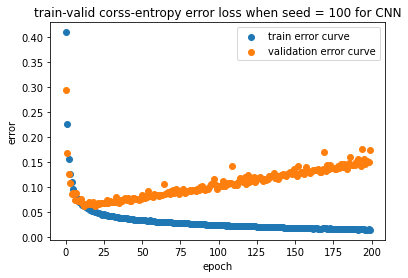

In [ ]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 100 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 100 for CNN')

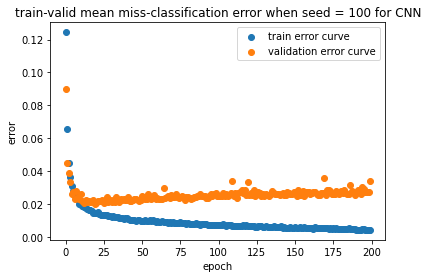

In [ ]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 100 for CNN")

### seed = 1000

In [ ]:
torch.manual_seed(1000)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.out = torch.nn.Linear(4 * 14 * 14, 10)


    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [ ]:
CNNnet3 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(CNNnet3.parameters(), lr=0.1)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    CNNnet3 = CNNnet3.cuda()
    criterion = criterion.cuda()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(CNNnet3, n_epochs)

Epoch:  0 | Loss: 0.4230 | Train Accuracy: 0.87
Epoch:  20 | Loss: 0.0763 | Train Accuracy: 0.98
Epoch:  40 | Loss: 0.0628 | Train Accuracy: 0.98
Epoch:  60 | Loss: 0.0571 | Train Accuracy: 0.98
Epoch:  80 | Loss: 0.0523 | Train Accuracy: 0.98
Epoch:  100 | Loss: 0.0498 | Train Accuracy: 0.98
Epoch:  120 | Loss: 0.0472 | Train Accuracy: 0.99
Epoch:  140 | Loss: 0.0462 | Train Accuracy: 0.99
Epoch:  160 | Loss: 0.0444 | Train Accuracy: 0.99
Epoch:  180 | Loss: 0.0434 | Train Accuracy: 0.99
final test cross_entropy error loss for CNN is  0.121508166
final test mis-classification error for CNN is  0.02739999999999998


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 1000 for CNN')

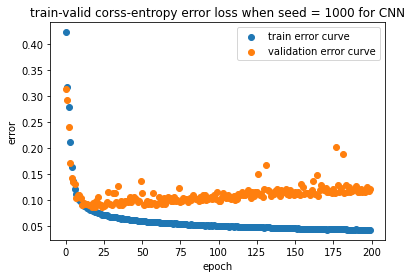

In [ ]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 1000 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 1000 for CNN')

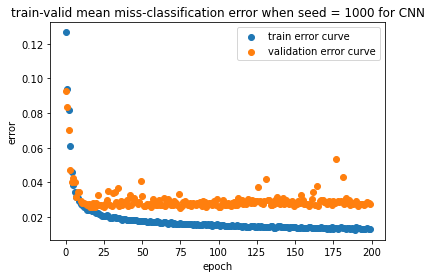

In [ ]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 1000 for CNN")

### seed = 10000

In [ ]:
torch.manual_seed(10000)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.out = torch.nn.Linear(4 * 14 * 14, 10)


    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [ ]:
CNNnet4 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(CNNnet4.parameters(), lr=0.1)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    CNNnet4 = CNNnet4.cuda()
    criterion = criterion.cuda()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(CNNnet4, n_epochs)

Epoch:  0 | Loss: 0.3797 | Train Accuracy: 0.89
Epoch:  20 | Loss: 0.0556 | Train Accuracy: 0.98
Epoch:  40 | Loss: 0.0446 | Train Accuracy: 0.99
Epoch:  60 | Loss: 0.0386 | Train Accuracy: 0.99
Epoch:  80 | Loss: 0.0341 | Train Accuracy: 0.99
Epoch:  100 | Loss: 0.0313 | Train Accuracy: 0.99
Epoch:  120 | Loss: 0.0290 | Train Accuracy: 0.99
Epoch:  140 | Loss: 0.0269 | Train Accuracy: 0.99
Epoch:  160 | Loss: 0.0251 | Train Accuracy: 0.99
Epoch:  180 | Loss: 0.0237 | Train Accuracy: 0.99
final test cross_entropy error loss for CNN is  0.15225099
final test mis-classification error for CNN is  0.02849999999999997


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 10000 for CNN')

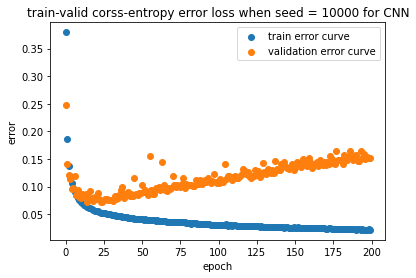

In [ ]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 10000 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 10000 for CNN')

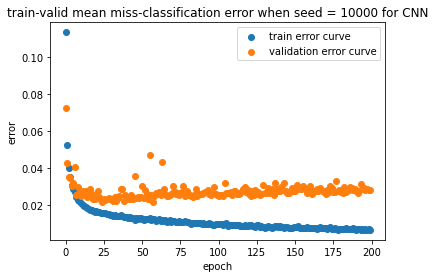

In [ ]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 10000 for CNN")

### seed = 10086

In [ ]:
torch.manual_seed(10086)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.out = torch.nn.Linear(4 * 14 * 14, 10)


    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [ ]:
CNNnet5 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(CNNnet5.parameters(), lr=0.1)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    CNNnet5 = CNNnet5.cuda()
    criterion = criterion.cuda()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(CNNnet5, n_epochs)

Epoch:  0 | Loss: 0.3542 | Train Accuracy: 0.89
Epoch:  20 | Loss: 0.0565 | Train Accuracy: 0.98
Epoch:  40 | Loss: 0.0437 | Train Accuracy: 0.99
Epoch:  60 | Loss: 0.0359 | Train Accuracy: 0.99
Epoch:  80 | Loss: 0.0309 | Train Accuracy: 0.99
Epoch:  100 | Loss: 0.0273 | Train Accuracy: 0.99
Epoch:  120 | Loss: 0.0253 | Train Accuracy: 0.99
Epoch:  140 | Loss: 0.0229 | Train Accuracy: 0.99
Epoch:  160 | Loss: 0.0208 | Train Accuracy: 0.99
Epoch:  180 | Loss: 0.0192 | Train Accuracy: 0.99
final test cross_entropy error loss for CNN is  0.1375785
final test mis-classification error for CNN is  0.025699999999999945


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 10086 for CNN')

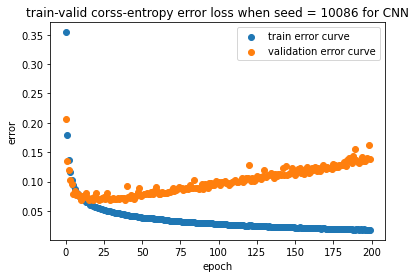

In [ ]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 10086 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 10086 for CNN')

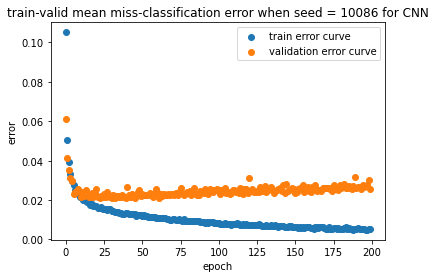

In [ ]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 10086 for CNN")

## 4 c

CNN net 5 has the smallest test error

In [ ]:
W = CNNnet5.state_dict()['cnn_layers.0.weight'].reshape(4,3,3)

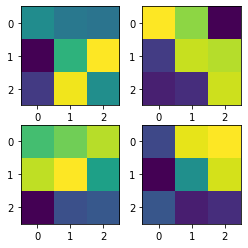

In [ ]:
fig = plt.figure(figsize = (4,4))
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.imshow(W[i])

## 4 d

### lr = 0.01

In [246]:
torch.manual_seed(10086)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.out = torch.nn.Linear(4 * 14 * 14, 10)


    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [ ]:
CNNnet6 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(CNNnet6.parameters(), lr=0.01)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    CNNnet6 = CNNnet6.cuda()
    criterion = criterion.cuda()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(CNNnet6, n_epochs)

Epoch:  0 | Loss: 0.7409 | Train Accuracy: 0.81
Epoch:  20 | Loss: 0.1396 | Train Accuracy: 0.96
Epoch:  40 | Loss: 0.0966 | Train Accuracy: 0.97
Epoch:  60 | Loss: 0.0782 | Train Accuracy: 0.98
Epoch:  80 | Loss: 0.0686 | Train Accuracy: 0.98
Epoch:  100 | Loss: 0.0623 | Train Accuracy: 0.98
Epoch:  120 | Loss: 0.0578 | Train Accuracy: 0.98
Epoch:  140 | Loss: 0.0540 | Train Accuracy: 0.98
Epoch:  160 | Loss: 0.0510 | Train Accuracy: 0.99
Epoch:  180 | Loss: 0.0485 | Train Accuracy: 0.99
final test cross_entropy error loss for CNN is  0.07042205
final test mis-classification error for CNN is  0.021399999999999975


Text(0.5, 1.0, 'train-valid corss-entropy error loss when lr = 0.01 for CNN')

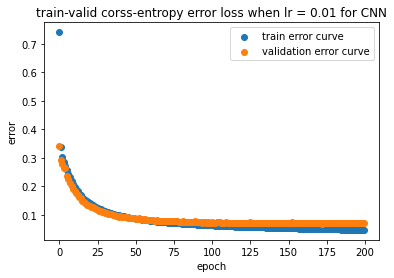

In [ ]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when lr = 0.01 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when lr = 0.01 for CNN')

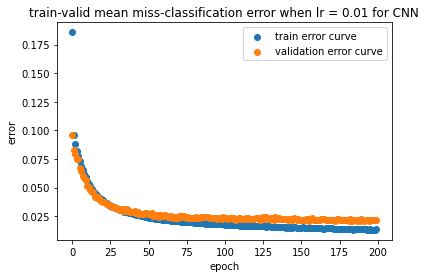

In [ ]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when lr = 0.01 for CNN")

### lr = 0.2

In [ ]:
CNNnet7 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(CNNnet7.parameters(), lr=0.2)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    CNNnet7 = CNNnet7.cuda()
    criterion = criterion.cuda()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(CNNnet7, n_epochs)

Epoch:  0 | Loss: 0.3110 | Train Accuracy: 0.91
Epoch:  20 | Loss: 0.0506 | Train Accuracy: 0.98
Epoch:  40 | Loss: 0.0407 | Train Accuracy: 0.99
Epoch:  60 | Loss: 0.0357 | Train Accuracy: 0.99
Epoch:  80 | Loss: 0.0321 | Train Accuracy: 0.99
Epoch:  100 | Loss: 0.0310 | Train Accuracy: 0.99
Epoch:  120 | Loss: 0.0286 | Train Accuracy: 0.99
Epoch:  140 | Loss: 0.0269 | Train Accuracy: 0.99
Epoch:  160 | Loss: 0.0243 | Train Accuracy: 0.99
Epoch:  180 | Loss: 0.0231 | Train Accuracy: 0.99
final test cross_entropy error loss for CNN is  0.18426909
final test mis-classification error for CNN is  0.030100000000000016


Text(0.5, 1.0, 'train-valid corss-entropy error loss when lr = 0.2 for CNN')

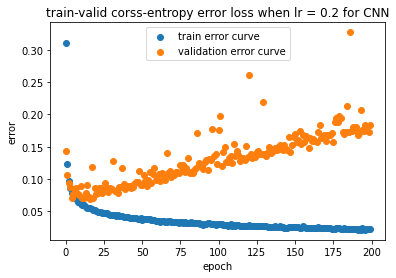

In [ ]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when lr = 0.2 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when lr = 0.2 for CNN')

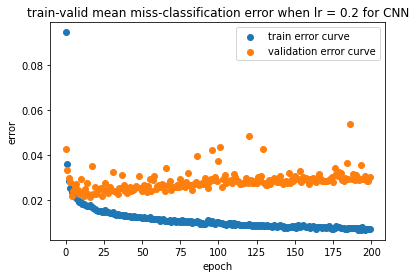

In [ ]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when lr = 0.2 for CNN")

### lr = 0.5

In [ ]:
CNNnet8 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(CNNnet8.parameters(), lr=0.5)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    CNNnet8 = CNNnet8.cuda()
    criterion = criterion.cuda()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(CNNnet8, n_epochs)

Epoch:  0 | Loss: 2.3023 | Train Accuracy: 0.11
Epoch:  20 | Loss: 2.3055 | Train Accuracy: 0.11
Epoch:  40 | Loss: 2.3054 | Train Accuracy: 0.11
Epoch:  60 | Loss: 2.3053 | Train Accuracy: 0.11
Epoch:  80 | Loss: 2.3056 | Train Accuracy: 0.11
Epoch:  100 | Loss: 2.3054 | Train Accuracy: 0.11
Epoch:  120 | Loss: 2.3052 | Train Accuracy: 0.11
Epoch:  140 | Loss: 2.3055 | Train Accuracy: 0.11
Epoch:  160 | Loss: 2.3056 | Train Accuracy: 0.11
Epoch:  180 | Loss: 2.3054 | Train Accuracy: 0.11
final test cross_entropy error loss for CNN is  2.3049736
final test mis-classification error for CNN is  0.902


Text(0.5, 1.0, 'train-valid corss-entropy error loss when lr = 0.5 for CNN')

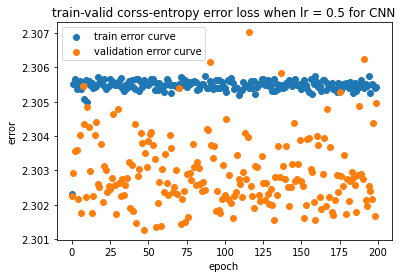

In [ ]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when lr = 0.5 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when lr = 0.5 for CNN')

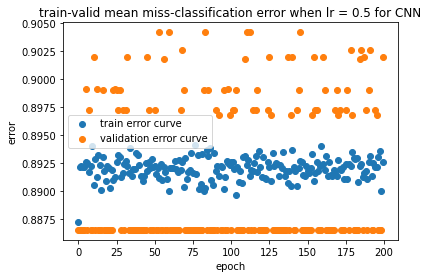

In [ ]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when lr = 0.5 for CNN")

### momentum = 0.5

In [ ]:
CNNnet9 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(CNNnet9.parameters(), lr=0.1, momentum = 0.5)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    CNNnet9 = CNNnet9.cuda()
    criterion = criterion.cuda()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(CNNnet9, n_epochs)

Epoch:  0 | Loss: 0.3033 | Train Accuracy: 0.91
Epoch:  20 | Loss: 0.0559 | Train Accuracy: 0.98
Epoch:  40 | Loss: 0.0438 | Train Accuracy: 0.99
Epoch:  60 | Loss: 0.0370 | Train Accuracy: 0.99
Epoch:  80 | Loss: 0.0331 | Train Accuracy: 0.99
Epoch:  100 | Loss: 0.0291 | Train Accuracy: 0.99
Epoch:  120 | Loss: 0.0269 | Train Accuracy: 0.99
Epoch:  140 | Loss: 0.0252 | Train Accuracy: 0.99
Epoch:  160 | Loss: 0.0248 | Train Accuracy: 0.99
Epoch:  180 | Loss: 0.0223 | Train Accuracy: 0.99
final test cross_entropy error loss for CNN is  0.17201342
final test mis-classification error for CNN is  0.02749999999999997


Text(0.5, 1.0, 'train-valid corss-entropy error loss when momentum = 0.5 for CNN')

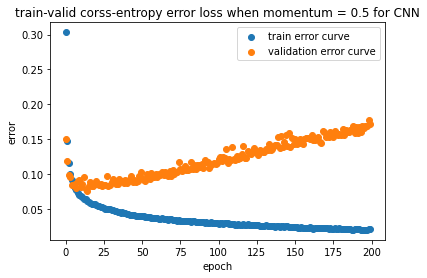

In [ ]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when momentum = 0.5 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when momentum = 0.5 for CNN')

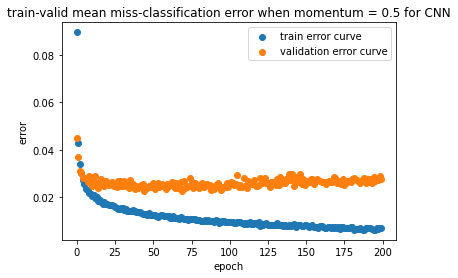

In [ ]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when momentum = 0.5 for CNN")

### momentum = 0.9

In [ ]:
CNNnet10 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(CNNnet10.parameters(), lr=0.1, momentum = 0.9)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()
if torch.cuda.is_available():
    CNNnet10 = CNNnet10.cuda()
    criterion = criterion.cuda()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(CNNnet10, n_epochs)

Epoch:  0 | Loss: 0.4163 | Train Accuracy: 0.88
Epoch:  20 | Loss: 0.3496 | Train Accuracy: 0.90
Epoch:  40 | Loss: 0.3391 | Train Accuracy: 0.91
Epoch:  60 | Loss: 0.3463 | Train Accuracy: 0.90
Epoch:  80 | Loss: 0.3435 | Train Accuracy: 0.90
Epoch:  100 | Loss: 0.3442 | Train Accuracy: 0.90
Epoch:  120 | Loss: 0.3508 | Train Accuracy: 0.90
Epoch:  140 | Loss: 0.3662 | Train Accuracy: 0.90
Epoch:  160 | Loss: 0.3407 | Train Accuracy: 0.90
Epoch:  180 | Loss: 0.3484 | Train Accuracy: 0.90
final test cross_entropy error loss for CNN is  0.34495714
final test mis-classification error for CNN is  0.09160000000000001


Text(0.5, 1.0, 'train-valid corss-entropy error loss when momentum = 0.9 for CNN')

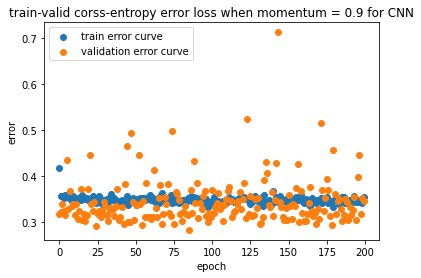

In [ ]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when momentum = 0.9 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when momentum = 0.9 for CNN')

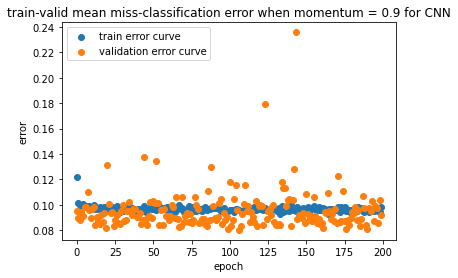

In [ ]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when momentum = 0.9 for CNN")

## 5 ab

### seed = 1

In [274]:
torch.manual_seed(1)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers1 = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(4),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=0.2))
        self.out = torch.nn.Linear(4 * 14 * 14, 10)


    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers1(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [132]:
favnet1 = CNNNet()
# defining the optimizer
optimizer = torch.optim.SGD(favnet1.parameters(), lr=0.1)
# defining the loss function
loss_func = torch.nn.CrossEntropyLoss()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet1, n_epochs)

Epoch:  0 | Loss: 0.2898 | Train Accuracy: 0.91
Epoch:  20 | Loss: 0.1197 | Train Accuracy: 0.96
Epoch:  40 | Loss: 0.1126 | Train Accuracy: 0.96
Epoch:  60 | Loss: 0.1074 | Train Accuracy: 0.97
Epoch:  80 | Loss: 0.1080 | Train Accuracy: 0.97
Epoch:  100 | Loss: 0.1063 | Train Accuracy: 0.97
Epoch:  120 | Loss: 0.1052 | Train Accuracy: 0.97
Epoch:  140 | Loss: 0.1048 | Train Accuracy: 0.97
Epoch:  160 | Loss: 0.1039 | Train Accuracy: 0.97
Epoch:  180 | Loss: 0.1006 | Train Accuracy: 0.97
final test cross_entropy error loss for CNN is  0.110939845
final test mis-classification error for CNN is  0.03359999999999996


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 1 for CNN')

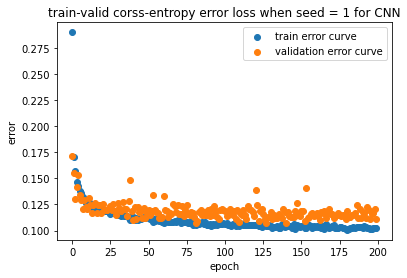

In [275]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 1 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 1 for CNN')

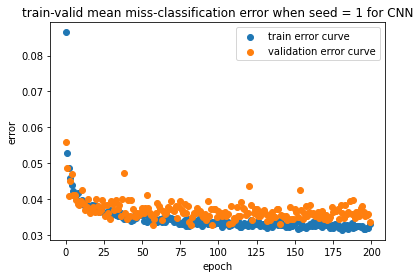

In [276]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 1 for CNN")

### seed = 100

In [277]:
torch.manual_seed(100)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(4),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=0.2))
        self.out = torch.nn.Linear(4 * 14 * 14, 10)
    
    def forward(self, x):
        x = self.cnn_layers1(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [278]:
favnet2 = CNNNet()
optimizer = torch.optim.SGD(favnet2.parameters(), lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()

n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet2, n_epochs)

Epoch:  0 | Loss: 0.2765 | Train Accuracy: 0.92
Epoch:  20 | Loss: 0.0946 | Train Accuracy: 0.97
Epoch:  40 | Loss: 0.0887 | Train Accuracy: 0.97
Epoch:  60 | Loss: 0.0843 | Train Accuracy: 0.97
Epoch:  80 | Loss: 0.0841 | Train Accuracy: 0.97
Epoch:  100 | Loss: 0.0813 | Train Accuracy: 0.97
Epoch:  120 | Loss: 0.0777 | Train Accuracy: 0.97
Epoch:  140 | Loss: 0.0794 | Train Accuracy: 0.98
Epoch:  160 | Loss: 0.0793 | Train Accuracy: 0.97
Epoch:  180 | Loss: 0.0779 | Train Accuracy: 0.98
final test cross_entropy error loss for CNN is  0.10308717
final test mis-classification error for CNN is  0.031000000000000028


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 100 for CNN')

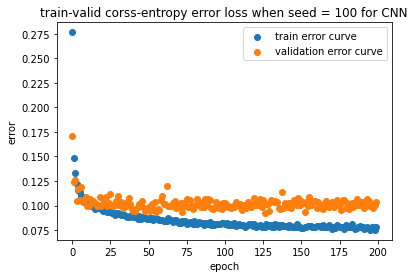

In [279]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 100 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 100 for CNN')

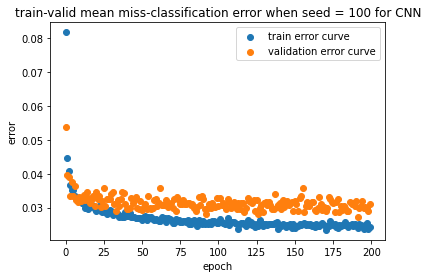

In [280]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 100 for CNN")

### seed = 1000

In [281]:
torch.manual_seed(1000)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(4),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=0.2))
        self.out = torch.nn.Linear(4 * 14 * 14, 10)
    
    def forward(self, x):
        x = self.cnn_layers1(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [282]:
favnet3 = CNNNet()
optimizer = torch.optim.SGD(favnet3.parameters(), lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()
n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet3, n_epochs)

Epoch:  0 | Loss: 0.3980 | Train Accuracy: 0.88
Epoch:  20 | Loss: 0.0889 | Train Accuracy: 0.97
Epoch:  40 | Loss: 0.0828 | Train Accuracy: 0.97
Epoch:  60 | Loss: 0.0801 | Train Accuracy: 0.97
Epoch:  80 | Loss: 0.0799 | Train Accuracy: 0.97
Epoch:  100 | Loss: 0.0782 | Train Accuracy: 0.98
Epoch:  120 | Loss: 0.0766 | Train Accuracy: 0.98
Epoch:  140 | Loss: 0.0725 | Train Accuracy: 0.98
Epoch:  160 | Loss: 0.0730 | Train Accuracy: 0.98
Epoch:  180 | Loss: 0.0726 | Train Accuracy: 0.98
final test cross_entropy error loss for CNN is  0.09350781
final test mis-classification error for CNN is  0.030299999999999994


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 1000 for CNN')

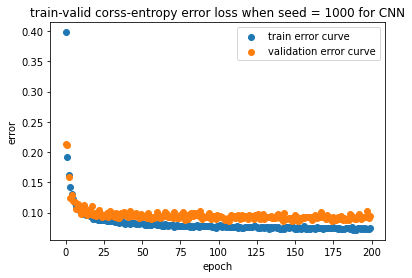

In [283]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 1000 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 1000 for CNN')

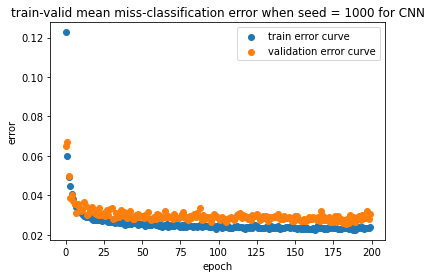

In [284]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 1000 for CNN")

### seed = 10000

In [285]:
torch.manual_seed(10000)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(4),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=0.2))
        self.out = torch.nn.Linear(4 * 14 * 14, 10)
    
    def forward(self, x):
        x = self.cnn_layers1(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [286]:
favnet4 = CNNNet()
optimizer = torch.optim.SGD(favnet4.parameters(), lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()
n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet4, n_epochs)

Epoch:  0 | Loss: 0.2840 | Train Accuracy: 0.91
Epoch:  20 | Loss: 0.0977 | Train Accuracy: 0.97
Epoch:  40 | Loss: 0.0919 | Train Accuracy: 0.97
Epoch:  60 | Loss: 0.0914 | Train Accuracy: 0.97
Epoch:  80 | Loss: 0.0862 | Train Accuracy: 0.97
Epoch:  100 | Loss: 0.0837 | Train Accuracy: 0.97
Epoch:  120 | Loss: 0.0813 | Train Accuracy: 0.97
Epoch:  140 | Loss: 0.0816 | Train Accuracy: 0.97
Epoch:  160 | Loss: 0.0822 | Train Accuracy: 0.97
Epoch:  180 | Loss: 0.0788 | Train Accuracy: 0.98
final test cross_entropy error loss for CNN is  0.10225743
final test mis-classification error for CNN is  0.03059999999999996


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 10000 for CNN')

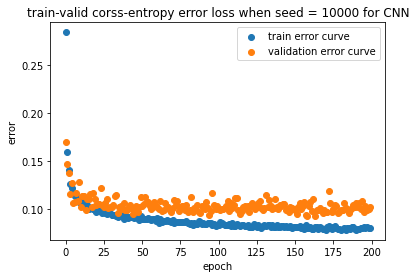

In [287]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 10000 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 10000 for CNN')

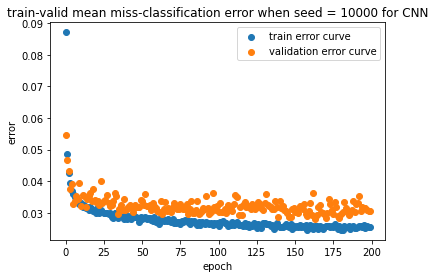

In [288]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 10000 for CNN")

### seed = 10086

In [289]:
torch.manual_seed(10086)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(4),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=0.2))
        self.out = torch.nn.Linear(4 * 14 * 14, 10)
    
    def forward(self, x):
        x = self.cnn_layers1(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [290]:
favnet5 = CNNNet()
optimizer = torch.optim.SGD(favnet5.parameters(), lr=0.1)
loss_func = torch.nn.CrossEntropyLoss()
n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet5, n_epochs)

Epoch:  0 | Loss: 0.2695 | Train Accuracy: 0.92
Epoch:  20 | Loss: 0.1028 | Train Accuracy: 0.97
Epoch:  40 | Loss: 0.0986 | Train Accuracy: 0.97
Epoch:  60 | Loss: 0.0972 | Train Accuracy: 0.97
Epoch:  80 | Loss: 0.0939 | Train Accuracy: 0.97
Epoch:  100 | Loss: 0.0919 | Train Accuracy: 0.97
Epoch:  120 | Loss: 0.0915 | Train Accuracy: 0.97
Epoch:  140 | Loss: 0.0896 | Train Accuracy: 0.97
Epoch:  160 | Loss: 0.0875 | Train Accuracy: 0.97
Epoch:  180 | Loss: 0.0888 | Train Accuracy: 0.97
final test cross_entropy error loss for CNN is  0.111532375
final test mis-classification error for CNN is  0.03169999999999995


Text(0.5, 1.0, 'train-valid corss-entropy error loss when seed = 10086 for CNN')

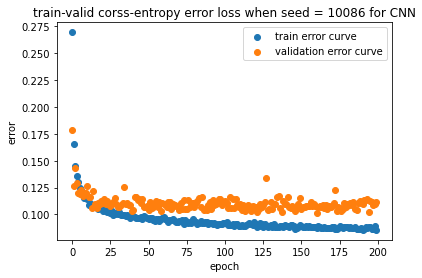

In [291]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when seed = 10086 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when seed = 10086 for CNN')

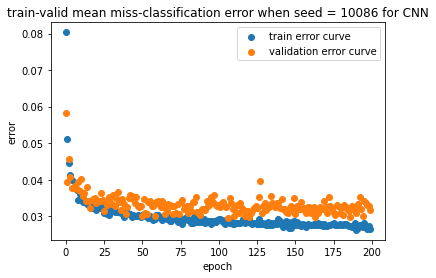

In [292]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when seed = 10086 for CNN")

## 5 c

In [293]:
W = favnet3.state_dict()['cnn_layers1.0.weight'].reshape(4,3,3)

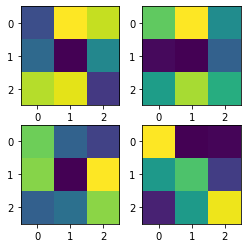

In [294]:
fig = plt.figure(figsize = (4,4))
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.imshow(W[i])

## 5 d

### lr = 0.01

In [295]:
torch.manual_seed(1000)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(4),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Dropout(p=0.2))
        self.out = torch.nn.Linear(4 * 14 * 14, 10)
    
    def forward(self, x):
        x = self.cnn_layers1(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [296]:
favnet6 = CNNNet()
optimizer = torch.optim.SGD(favnet6.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()
n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet6, n_epochs)

Epoch:  0 | Loss: 0.6106 | Train Accuracy: 0.82
Epoch:  20 | Loss: 0.1110 | Train Accuracy: 0.97
Epoch:  40 | Loss: 0.0953 | Train Accuracy: 0.97
Epoch:  60 | Loss: 0.0896 | Train Accuracy: 0.97
Epoch:  80 | Loss: 0.0866 | Train Accuracy: 0.97
Epoch:  100 | Loss: 0.0843 | Train Accuracy: 0.97
Epoch:  120 | Loss: 0.0835 | Train Accuracy: 0.97
Epoch:  140 | Loss: 0.0784 | Train Accuracy: 0.98
Epoch:  160 | Loss: 0.0768 | Train Accuracy: 0.98
Epoch:  180 | Loss: 0.0774 | Train Accuracy: 0.98
final test cross_entropy error loss for CNN is  0.08785416
final test mis-classification error for CNN is  0.028200000000000003


Text(0.5, 1.0, 'train-valid corss-entropy error loss when lr = 0.01 for CNN')

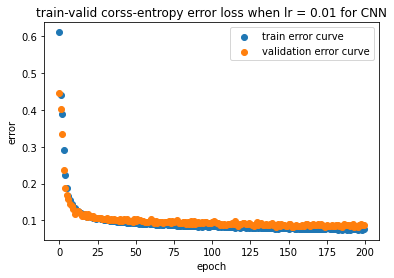

In [297]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when lr = 0.01 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when lr = 0.01 for CNN')

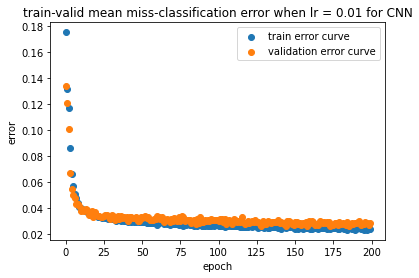

In [298]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when lr = 0.01 for CNN")

### lr = 0.2

In [299]:
favnet7 = CNNNet()
optimizer = torch.optim.SGD(favnet7.parameters(), lr=0.2)
loss_func = torch.nn.CrossEntropyLoss()
n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet7, n_epochs)

Epoch:  0 | Loss: 0.4104 | Train Accuracy: 0.87
Epoch:  20 | Loss: 0.2401 | Train Accuracy: 0.93
Epoch:  40 | Loss: 0.2175 | Train Accuracy: 0.93
Epoch:  60 | Loss: 0.2069 | Train Accuracy: 0.94
Epoch:  80 | Loss: 0.4381 | Train Accuracy: 0.86
Epoch:  100 | Loss: 0.4330 | Train Accuracy: 0.87
Epoch:  120 | Loss: 0.4334 | Train Accuracy: 0.87
Epoch:  140 | Loss: 0.4305 | Train Accuracy: 0.87
Epoch:  160 | Loss: 0.4267 | Train Accuracy: 0.87
Epoch:  180 | Loss: 0.4298 | Train Accuracy: 0.87
final test cross_entropy error loss for CNN is  0.44292855
final test mis-classification error for CNN is  0.12729999999999997


Text(0.5, 1.0, 'train-valid corss-entropy error loss when lr = 0.2 for CNN')

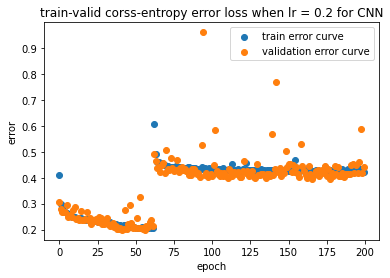

In [300]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when lr = 0.2 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when lr = 0.2 for CNN')

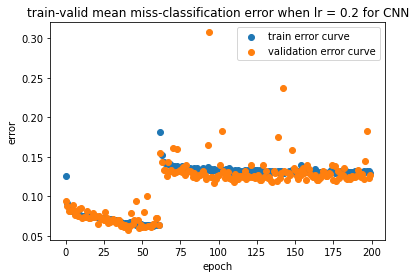

In [301]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when lr = 0.2 for CNN")

### lr = 0.5

In [302]:
favnet8 = CNNNet()
optimizer = torch.optim.SGD(favnet8.parameters(), lr=0.5)
loss_func = torch.nn.CrossEntropyLoss()
n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet8, n_epochs)

Epoch:  0 | Loss: 2.3145 | Train Accuracy: 0.11
Epoch:  20 | Loss: 2.3056 | Train Accuracy: 0.11
Epoch:  40 | Loss: 2.3056 | Train Accuracy: 0.11
Epoch:  60 | Loss: 2.3054 | Train Accuracy: 0.11
Epoch:  80 | Loss: 2.3057 | Train Accuracy: 0.11
Epoch:  100 | Loss: 2.3054 | Train Accuracy: 0.11
Epoch:  120 | Loss: 2.3055 | Train Accuracy: 0.11
Epoch:  140 | Loss: 2.3055 | Train Accuracy: 0.11
Epoch:  160 | Loss: 2.3056 | Train Accuracy: 0.11
Epoch:  180 | Loss: 2.3055 | Train Accuracy: 0.11
final test cross_entropy error loss for CNN is  2.3019936
final test mis-classification error for CNN is  0.8865


Text(0.5, 1.0, 'train-valid corss-entropy error loss when lr = 0.5 for CNN')

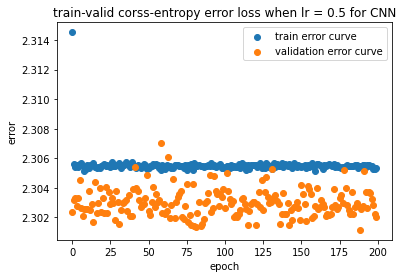

In [303]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when lr = 0.5 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when lr = 0.5 for CNN')

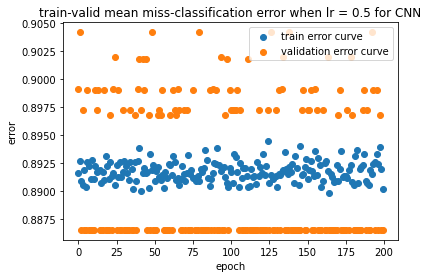

In [304]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when lr = 0.5 for CNN")

### momentum = 0.5

In [305]:
favnet9 = CNNNet()
optimizer = torch.optim.SGD(favnet9.parameters(), lr=0.1, momentum = 0.5)
loss_func = torch.nn.CrossEntropyLoss()
n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet9, n_epochs)

Epoch:  0 | Loss: 0.5618 | Train Accuracy: 0.83
Epoch:  20 | Loss: 0.2025 | Train Accuracy: 0.94
Epoch:  40 | Loss: 0.1940 | Train Accuracy: 0.94
Epoch:  60 | Loss: 0.1936 | Train Accuracy: 0.94
Epoch:  80 | Loss: 0.1957 | Train Accuracy: 0.94
Epoch:  100 | Loss: 0.1925 | Train Accuracy: 0.94
Epoch:  120 | Loss: 0.1947 | Train Accuracy: 0.94
Epoch:  140 | Loss: 0.1909 | Train Accuracy: 0.94
Epoch:  160 | Loss: 0.1945 | Train Accuracy: 0.94
Epoch:  180 | Loss: 0.1913 | Train Accuracy: 0.94
final test cross_entropy error loss for CNN is  0.19057769
final test mis-classification error for CNN is  0.059699999999999975


Text(0.5, 1.0, 'train-valid corss-entropy error loss when momentum = 0.5 for CNN')

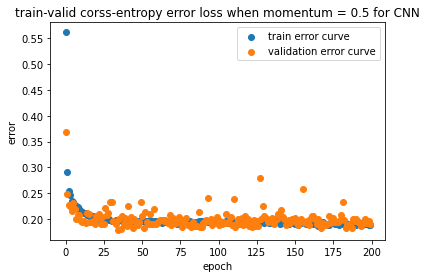

In [306]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when momentum = 0.5 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when momentum = 0.5 for CNN')

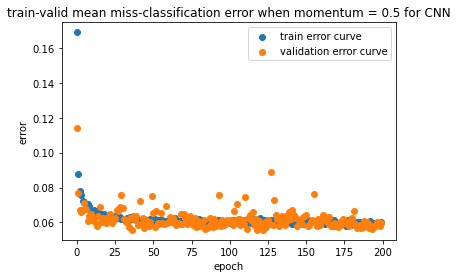

In [307]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when momentum = 0.5 for CNN")

### momentum = 0.9

In [308]:
favnet10 = CNNNet()
optimizer = torch.optim.SGD(favnet10.parameters(), lr=0.1, momentum = 0.9)
loss_func = torch.nn.CrossEntropyLoss()
n_epochs = 200
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet10, n_epochs)

Epoch:  0 | Loss: 0.2532 | Train Accuracy: 0.93
Epoch:  20 | Loss: 0.1210 | Train Accuracy: 0.96
Epoch:  40 | Loss: 0.1528 | Train Accuracy: 0.95
Epoch:  60 | Loss: 0.1467 | Train Accuracy: 0.96
Epoch:  80 | Loss: 0.1470 | Train Accuracy: 0.96
Epoch:  100 | Loss: 0.1437 | Train Accuracy: 0.96
Epoch:  120 | Loss: 0.1447 | Train Accuracy: 0.96
Epoch:  140 | Loss: 0.1435 | Train Accuracy: 0.96
Epoch:  160 | Loss: 0.1411 | Train Accuracy: 0.96
Epoch:  180 | Loss: 0.1431 | Train Accuracy: 0.96
final test cross_entropy error loss for CNN is  0.15150012
final test mis-classification error for CNN is  0.04479999999999995


Text(0.5, 1.0, 'train-valid corss-entropy error loss when momentum = 0.9 for CNN')

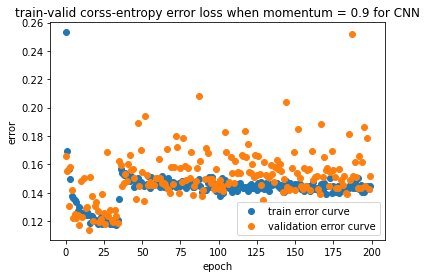

In [309]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when momentum = 0.9 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when momentum = 0.9 for CNN')

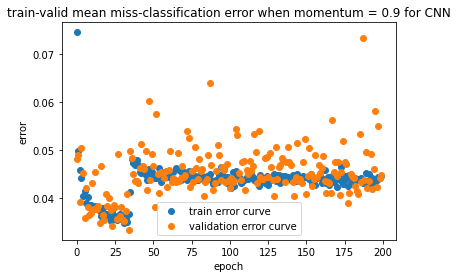

In [310]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when momentum = 0.9 for CNN")

### Best

In [129]:
torch.manual_seed(10086)
class CNNNet(torch.nn.Module):   
    def __init__(self):
        super(CNNNet, self).__init__()
        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.out = torch.nn.Linear(4 * 14 * 14, 10)


    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [130]:
favnet = CNNNet()
optimizer = torch.optim.SGD(favnet.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()
n_epochs = 400
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
test_error = []
train_error = []

train_CNN(favnet, n_epochs)

Epoch:  0 | Loss: 0.7409 | Train Accuracy: 0.81
Epoch:  20 | Loss: 0.1396 | Train Accuracy: 0.96
Epoch:  40 | Loss: 0.0966 | Train Accuracy: 0.97
Epoch:  60 | Loss: 0.0782 | Train Accuracy: 0.98
Epoch:  80 | Loss: 0.0686 | Train Accuracy: 0.98
Epoch:  100 | Loss: 0.0623 | Train Accuracy: 0.98
Epoch:  120 | Loss: 0.0578 | Train Accuracy: 0.98
Epoch:  140 | Loss: 0.0540 | Train Accuracy: 0.99
Epoch:  160 | Loss: 0.0510 | Train Accuracy: 0.99
Epoch:  180 | Loss: 0.0485 | Train Accuracy: 0.99
Epoch:  200 | Loss: 0.0463 | Train Accuracy: 0.99
Epoch:  220 | Loss: 0.0442 | Train Accuracy: 0.99
Epoch:  240 | Loss: 0.0427 | Train Accuracy: 0.99
Epoch:  260 | Loss: 0.0412 | Train Accuracy: 0.99
Epoch:  280 | Loss: 0.0396 | Train Accuracy: 0.99
Epoch:  300 | Loss: 0.0386 | Train Accuracy: 0.99
Epoch:  320 | Loss: 0.0375 | Train Accuracy: 0.99
Epoch:  340 | Loss: 0.0363 | Train Accuracy: 0.99
Epoch:  360 | Loss: 0.0353 | Train Accuracy: 0.99
Epoch:  380 | Loss: 0.0344 | Train Accuracy: 0.99
final 

Text(0.5, 1.0, 'train-valid corss-entropy error loss when lr = 0.01 for CNN')

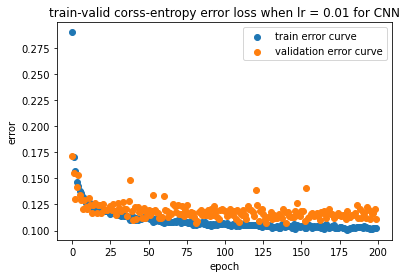

In [242]:
plt.scatter(y = train_loss, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_loss, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid corss-entropy error loss when lr = 0.01 for CNN")

Text(0.5, 1.0, 'train-valid mean miss-classification error when lr = 0.01 for CNN')

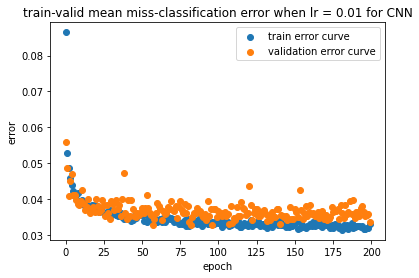

In [243]:
plt.scatter(y = train_error, x = list(range(n_epochs)), label = "train error curve")
plt.scatter(y = test_error, x = list(range(n_epochs)), label = "validation error curve")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("train-valid mean miss-classification error when lr = 0.01 for CNN")

## 6

In [185]:
train = pd.read_csv("train.txt", header = None)

In [159]:
test = pd.read_csv("test.txt", header = None)

In [160]:
val = pd.read_csv("val.txt", header = None)

In [61]:
train.loc[1][1568]

5.0

In [197]:
train_a = []

In [204]:
train_a = train.iloc[:20000,:28]
for i in range(27):
  train_a = train_a.join(train.iloc[:20000,28*(i*2+2):28*(i*2+3)])

In [208]:
train_b = train.iloc[:20000,28:56]
for i in range(27):
  train_b = train_b.join(train.iloc[:20000,28*(i*2+3):28*(i*2+4)])

In [214]:
test_a = test.iloc[:5000,:28]
for i in range(27):
  test_a = test_a.join(test.iloc[:5000,28*(i*2+2):28*(i*2+3)])

In [215]:
test_b = test.iloc[:5000,28:56]
for i in range(27):
  test_b = test_b.join(test.iloc[:5000,28*(i*2+3):28*(i*2+4)])

In [217]:
val_a = val.iloc[:5000,:28]
for i in range(27):
  val_a = val_a.join(val.iloc[:5000,28*(i*2+2):28*(i*2+3)])

In [218]:
val_b = val.iloc[:5000,28:56]
for i in range(27):
  val_b = val_b.join(val.iloc[:5000,28*(i*2+3):28*(i*2+4)])

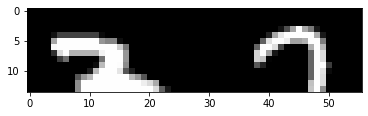

In [165]:
image =train.loc[1][:784].to_numpy().reshape(14,56)# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

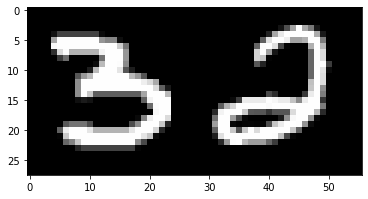

In [164]:
image =train.loc[1][:1568].to_numpy().reshape(28,56)# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

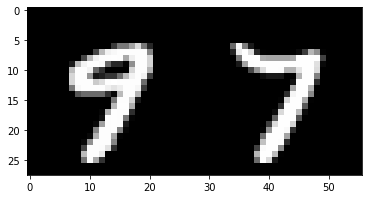

In [63]:
image =train.loc[3][:1568].to_numpy().reshape(28,56)# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [64]:
train.loc[3][1568]

16.0

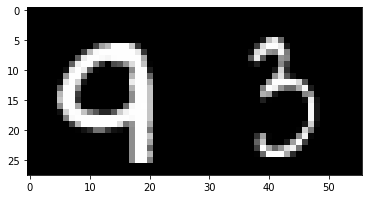

In [65]:
image =train.loc[4][:1568].to_numpy().reshape(28,56)# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [66]:
train.loc[4][1568]

12.0

The pixels are scaled in row major because python is row major.

The relationship between the two digits and the last coordinate is that the two digits add up to the last value

## 7

In [220]:
train_x_a = train_a.to_numpy().reshape(20000,1,28,28)
train_x_b = train_b.to_numpy().reshape(20000,1,28,28)
train_targ = train.loc[:,1568].to_numpy().astype(int)

In [221]:
test_x_a = test_a.to_numpy().reshape(5000,1,28,28)
test_x_b = test_b.to_numpy().reshape(5000,1,28,28)
test_targ = test.loc[:,1568].to_numpy().astype(int)

In [222]:
val_x_a = val_a.to_numpy().reshape(5000,1,28,28)
val_x_b = val_b.to_numpy().reshape(5000,1,28,28)
val_targ = val.loc[:,1568].to_numpy().astype(int)

In [223]:
train_x_a = torch.from_numpy(train_x_a)
train_x_b = torch.from_numpy(train_x_b)
test_x_a = torch.from_numpy(test_x_a)
test_x_b = torch.from_numpy(test_x_b)
val_x_a = torch.from_numpy(val_x_a)
val_x_b = torch.from_numpy(val_x_b)

In [224]:
train_x_a = train_x_a.type(torch.FloatTensor)
train_x_b = train_x_b.type(torch.FloatTensor)
test_x_a = test_x_a.type(torch.FloatTensor)
test_x_b = test_x_b.type(torch.FloatTensor)
val_x_a = val_x_a.type(torch.FloatTensor)
val_x_b = val_x_b.type(torch.FloatTensor)

## 7 a

### seed = 1

In [345]:
train_a = favnet1(train_x_a)
train_a_prediction = torch.max(train_a,1)[1]
pred_a_train = train_a_prediction.data.numpy()
train_b = favnet1(train_x_b)
train_b_prediction = torch.max(train_b,1)[1]
pred_b_train = train_b_prediction.data.numpy()

In [346]:
val_a = favnet1(val_x_a)
val_a_prediction = torch.max(val_a,1)[1]
pred_a_val = val_a_prediction.data.numpy()
val_b = favnet1(val_x_b)
val_b_prediction = torch.max(val_b,1)[1]
pred_b_val = val_b_prediction.data.numpy()

In [347]:
my_array = np.array([pred_a_train,pred_b_train, train_targ])
my_array = my_array.T

In [348]:
df = pd.DataFrame(my_array, columns = ['A','B','Y'])

In [349]:
my_array_val = np.array([pred_a_val,pred_b_val, val_targ])
my_array_val = my_array_val.T
df_val = pd.DataFrame(my_array_val, columns = ['A','B','Y'])

In [350]:
from sklearn.linear_model import LinearRegression

In [351]:
x = df.iloc[:20000,:2]
y = df['Y']
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.9350690965120676

In [355]:
x = df_val.iloc[:5000,:2]
y = df_val['Y']
reg.score(x,y)


0.9437564129695519

### seed = 100

In [356]:
train_a = favnet2(train_x_a)
train_a_prediction = torch.max(train_a,1)[1]
pred_a_train = train_a_prediction.data.numpy()
train_b = favnet2(train_x_b)
train_b_prediction = torch.max(train_b,1)[1]
pred_b_train = train_b_prediction.data.numpy()
val_a = favnet2(val_x_a)
val_a_prediction = torch.max(val_a,1)[1]
pred_a_val = val_a_prediction.data.numpy()
val_b = favnet2(val_x_b)
val_b_prediction = torch.max(val_b,1)[1]
pred_b_val = val_b_prediction.data.numpy()
my_array = np.array([pred_a_train,pred_b_train, train_targ])
my_array = my_array.T
df = pd.DataFrame(my_array, columns = ['A','B','Y'])
my_array_val = np.array([pred_a_val,pred_b_val, val_targ])
my_array_val = my_array_val.T
df_val = pd.DataFrame(my_array_val, columns = ['A','B','Y'])

In [357]:
x = df.iloc[:20000,:2]
y = df['Y']
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.947462215984245

In [358]:
x = df_val.iloc[:5000,:2]
y = df_val['Y']
reg.score(x, y)

0.9495394615645799

### seed = 1000

In [359]:
train_a = favnet3(train_x_a)
train_a_prediction = torch.max(train_a,1)[1]
pred_a_train = train_a_prediction.data.numpy()
train_b = favnet3(train_x_b)
train_b_prediction = torch.max(train_b,1)[1]
pred_b_train = train_b_prediction.data.numpy()
val_a = favnet3(val_x_a)
val_a_prediction = torch.max(val_a,1)[1]
pred_a_val = val_a_prediction.data.numpy()
val_b = favnet3(val_x_b)
val_b_prediction = torch.max(val_b,1)[1]
pred_b_val = val_b_prediction.data.numpy()
my_array = np.array([pred_a_train,pred_b_train, train_targ])
my_array = my_array.T
df = pd.DataFrame(my_array, columns = ['A','B','Y'])
my_array_val = np.array([pred_a_val,pred_b_val, val_targ])
my_array_val = my_array_val.T
df_val = pd.DataFrame(my_array_val, columns = ['A','B','Y'])

In [360]:
x = df.iloc[:20000,:2]
y = df['Y']
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.9539009263342899

In [361]:
x = df_val.iloc[:5000,:2]
y = df_val['Y']
reg.score(x, y)

0.9499685681834782

### seed = 10000

In [362]:
train_a = favnet4(train_x_a)
train_a_prediction = torch.max(train_a,1)[1]
pred_a_train = train_a_prediction.data.numpy()
train_b = favnet4(train_x_b)
train_b_prediction = torch.max(train_b,1)[1]
pred_b_train = train_b_prediction.data.numpy()
val_a = favnet4(val_x_a)
val_a_prediction = torch.max(val_a,1)[1]
pred_a_val = val_a_prediction.data.numpy()
val_b = favnet4(val_x_b)
val_b_prediction = torch.max(val_b,1)[1]
pred_b_val = val_b_prediction.data.numpy()
my_array = np.array([pred_a_train,pred_b_train, train_targ])
my_array = my_array.T
df = pd.DataFrame(my_array, columns = ['A','B','Y'])
my_array_val = np.array([pred_a_val,pred_b_val, val_targ])
my_array_val = my_array_val.T
df_val = pd.DataFrame(my_array_val, columns = ['A','B','Y'])

In [363]:
x = df.iloc[:20000,:2]
y = df['Y']
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.9519828481576584

In [364]:
x = df_val.iloc[:5000,:2]
y = df_val['Y']
reg.score(x, y)

0.9461583656647182

### seed = 10086

In [365]:
train_a = favnet5(train_x_a)
train_a_prediction = torch.max(train_a,1)[1]
pred_a_train = train_a_prediction.data.numpy()
train_b = favnet5(train_x_b)
train_b_prediction = torch.max(train_b,1)[1]
pred_b_train = train_b_prediction.data.numpy()
val_a = favnet5(val_x_a)
val_a_prediction = torch.max(val_a,1)[1]
pred_a_val = val_a_prediction.data.numpy()
val_b = favnet5(val_x_b)
val_b_prediction = torch.max(val_b,1)[1]
pred_b_val = val_b_prediction.data.numpy()
my_array = np.array([pred_a_train,pred_b_train, train_targ])
my_array = my_array.T
df = pd.DataFrame(my_array, columns = ['A','B','Y'])
my_array_val = np.array([pred_a_val,pred_b_val, val_targ])
my_array_val = my_array_val.T
df_val = pd.DataFrame(my_array_val, columns = ['A','B','Y'])

In [366]:
x = df.iloc[:20000,:2]
y = df['Y']
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.9452616347391529

In [367]:
x = df_val.iloc[:5000,:2]
y = df_val['Y']
reg.score(x, y)

0.9346604077911052

### 7c

In [368]:
train_a = favnet2(train_x_a)
train_a_prediction = torch.max(train_a,1)[1]
pred_a_train = train_a_prediction.data.numpy()
train_b = favnet2(train_x_b)
train_b_prediction = torch.max(train_b,1)[1]
pred_b_train = train_b_prediction.data.numpy()
val_a = favnet2(val_x_a)
val_a_prediction = torch.max(val_a,1)[1]
test_a = favnet2(test_x_a)
test_a_prediction = torch.max(test_a,1)[1]
pred_a_test = test_a_prediction.data.numpy()
test_b = favnet2(test_x_b)
test_b_prediction = torch.max(test_b,1)[1]
pred_b_test = test_b_prediction.data.numpy()
my_array = np.array([pred_a_train,pred_b_train, train_targ])
my_array = my_array.T
df = pd.DataFrame(my_array, columns = ['A','B','Y'])
my_array_test = np.array([pred_a_test,pred_b_test, test_targ])
my_array_test = my_array_test.T
df_test = pd.DataFrame(my_array_test, columns = ['A','B','Y'])

In [369]:
x = df.iloc[:20000,:2]
y = df['Y']
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.9469998758465592

In [370]:
x = df_test.iloc[:5000,:2]
y = df_test['Y']
reg.score(x, y)

0.930349554854832